In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
sns.set_theme()

In [3]:
df = pd.read_csv("train.csv")
display(df)

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163


In [4]:
df['date_hour'] = pd.to_datetime(df['date_hour'])

def datetime_preprocessing(df):
    df['hour'] = df['date_hour'].dt.hour
    df['dayofweek'] = df['date_hour'].dt.dayofweek
    df['dayofyear'] = df['date_hour'].dt.dayofyear
    df['weekday_name'] = df['date_hour'].dt.day_name()
    df['week_number'] = df['date_hour'].dt.isocalendar().week
    df['month'] = df['date_hour'].dt.month
    df['month_name'] = df['date_hour'].dt.month_name()
    df['year'] = df['date_hour'].dt.year
    season2011 = pd.cut(df['dayofyear'][df['year'] == 2011], bins=[0, 59, 151, 243, 334, 365], labels=['winter', 'spring', 'summer', 'fall', 'winter'], ordered=False)
    season2012 = pd.cut(df['dayofyear'][df['year'] == 2012], bins=[0, 60, 152, 244, 335, 366], labels=['winter', 'spring', 'summer', 'fall', 'winter'], ordered=False)
    df['season'] = season2011.tolist() + season2012.tolist()
    
    return df

df = datetime_preprocessing(df)
display(df[45:])

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,hour,dayofweek,dayofyear,weekday_name,week_number,month,month_name,year,season
45,2011-01-02 22:00:00,0,1,0.24,0.2121,0.44,0.2985,9,22,6,2,Sunday,52,1,January,2011,winter
46,2011-01-02 23:00:00,0,1,0.22,0.2273,0.47,0.1642,8,23,6,2,Sunday,52,1,January,2011,winter
47,2011-01-03 00:00:00,0,1,0.22,0.1970,0.44,0.3582,5,0,0,3,Monday,1,1,January,2011,winter
48,2011-01-03 01:00:00,0,1,0.20,0.1667,0.44,0.4179,2,1,0,3,Monday,1,1,January,2011,winter
49,2011-01-03 04:00:00,0,1,0.16,0.1364,0.47,0.3881,1,4,0,3,Monday,1,1,January,2011,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377,19,4,335,Friday,48,11,November,2012,fall
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245,20,4,335,Friday,48,11,November,2012,fall
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183,21,4,335,Friday,48,11,November,2012,fall
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163,22,4,335,Friday,48,11,November,2012,fall


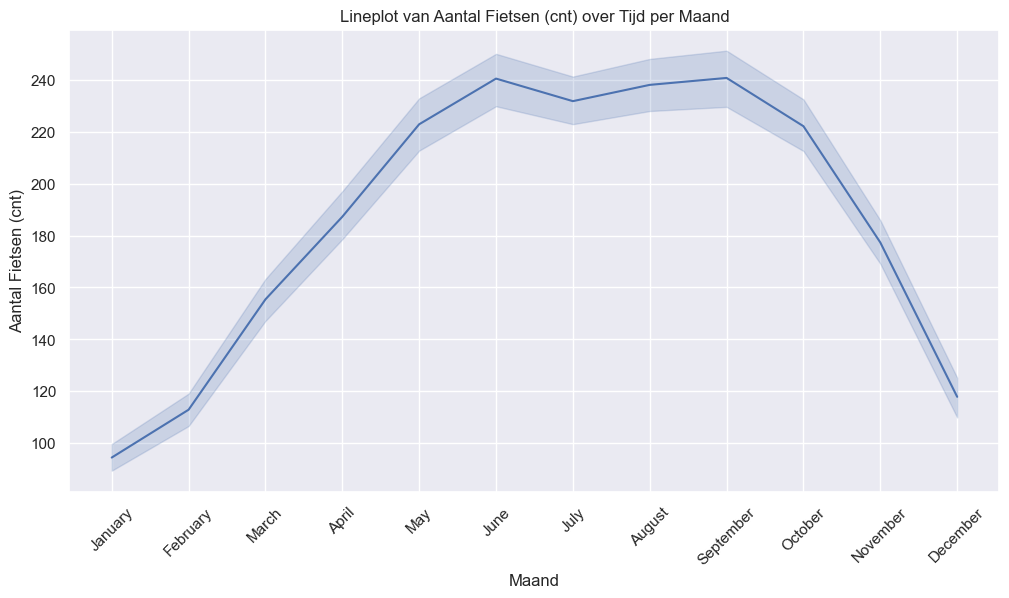

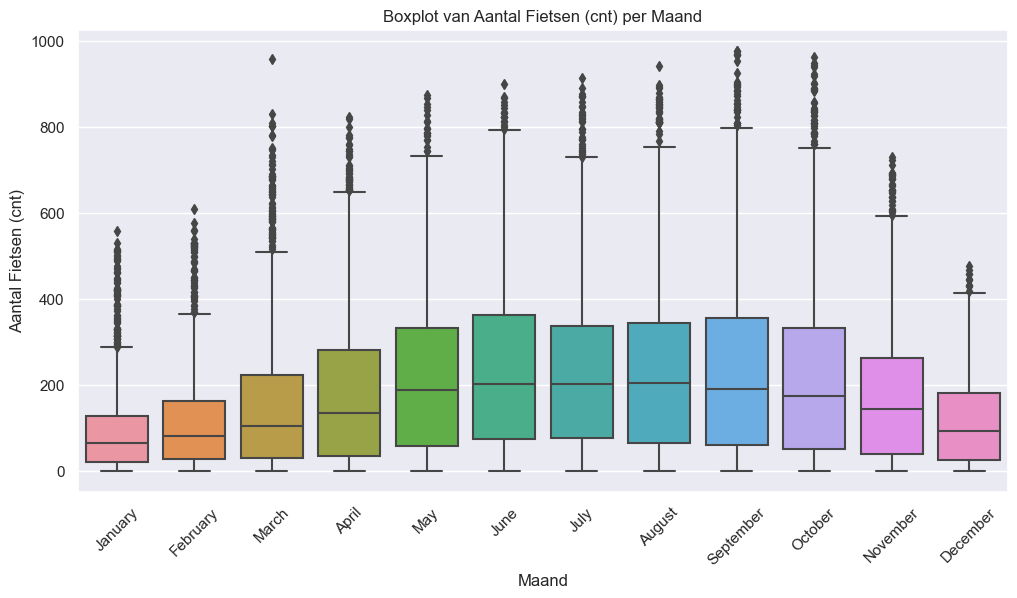

In [5]:

"""Codecell that creates a lineplot and a boxplot.

1.	The x and y values are set on ‘date_hour’ and ‘cnt’
2.	The labels and tick rotation are set
3.	The visualisations are created

Parameters:
- df: DataFrame
    The input DataFrame containing relevant columns for visualization."""

plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date_hour'].dt.strftime('%B'), y='cnt', data=df)
plt.title('Lineplot van Aantal Fietsen (cnt) over Tijd per Maand')
plt.xlabel('Maand')
plt.ylabel('Aantal Fietsen (cnt)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['date_hour'].dt.strftime('%B'), y='cnt', data=df, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Boxplot van Aantal Fietsen (cnt) per Maand')
plt.xlabel('Maand')
plt.ylabel('Aantal Fietsen (cnt)')
plt.xticks(rotation=45)
plt.show()

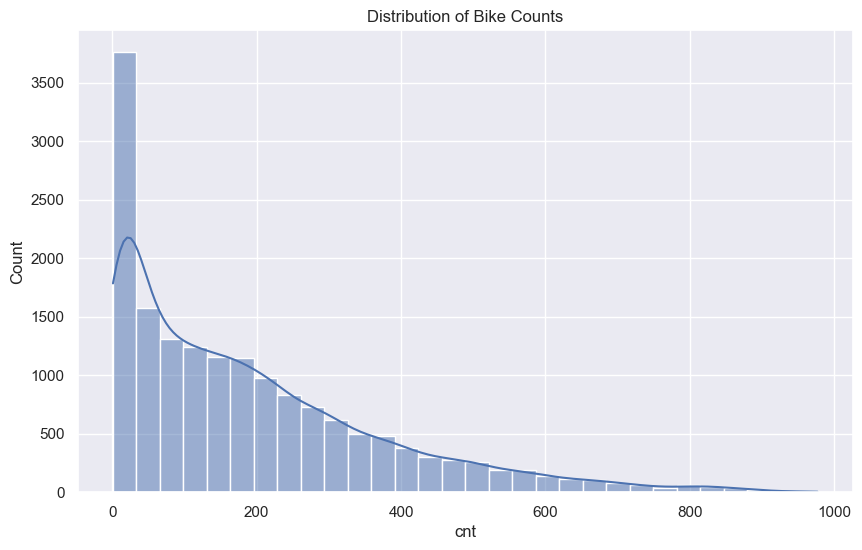

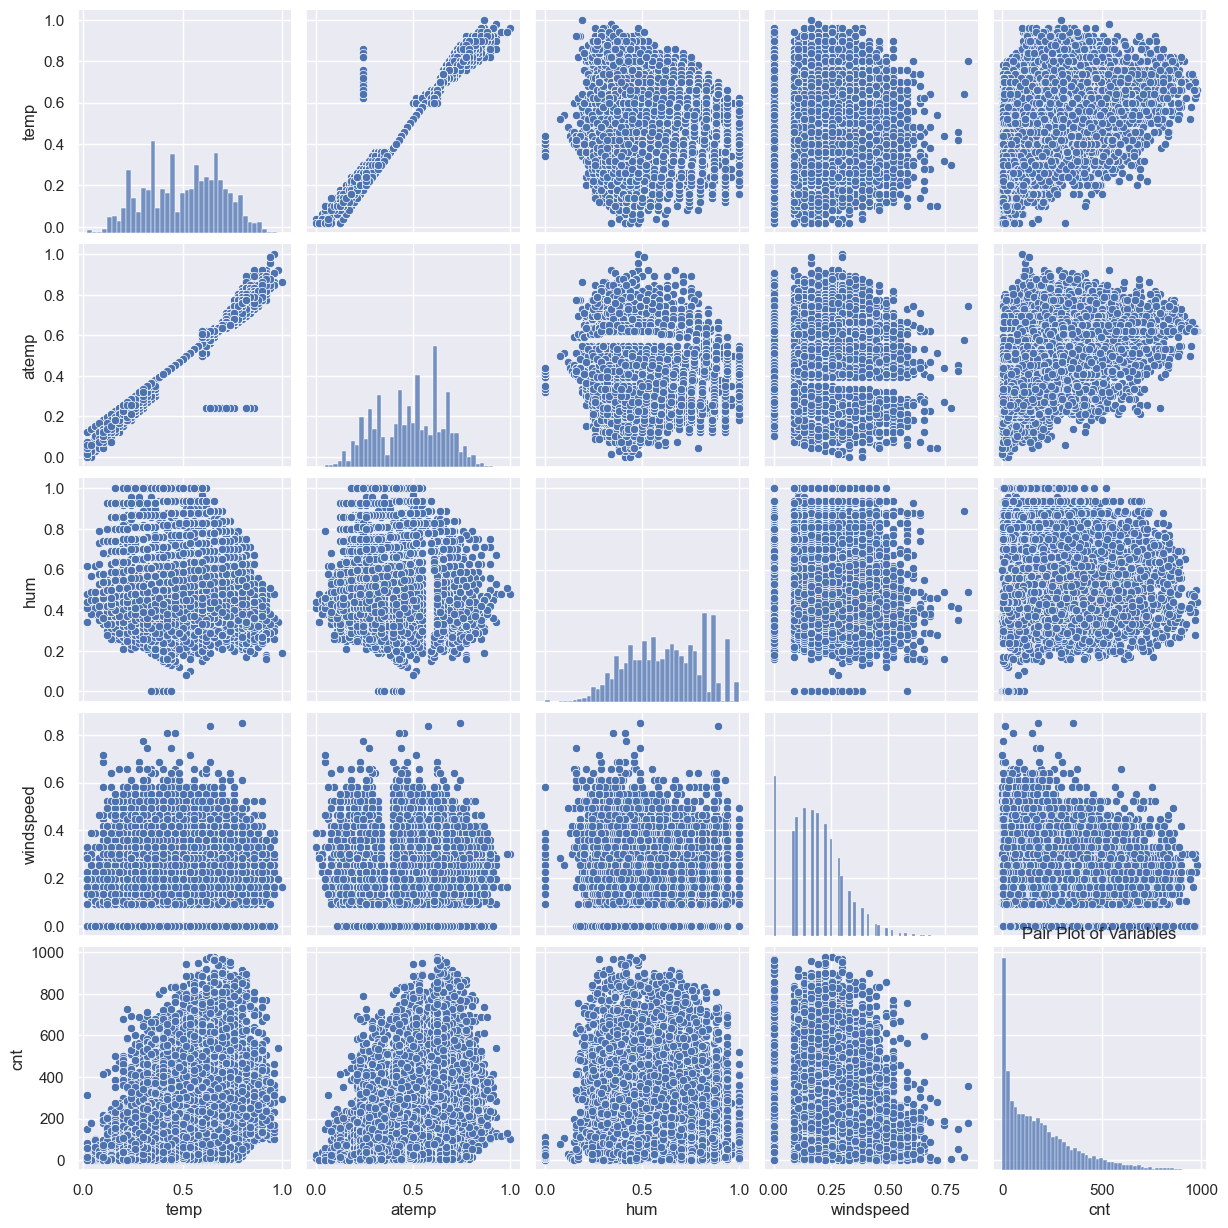

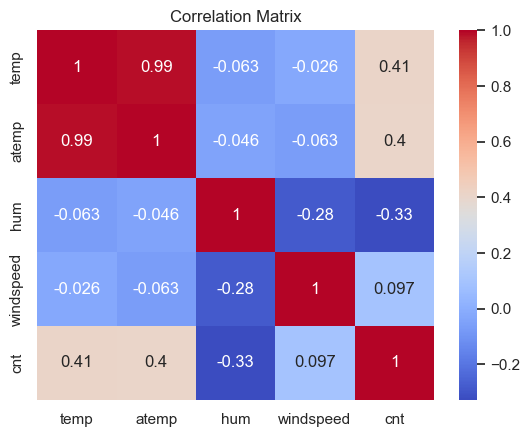

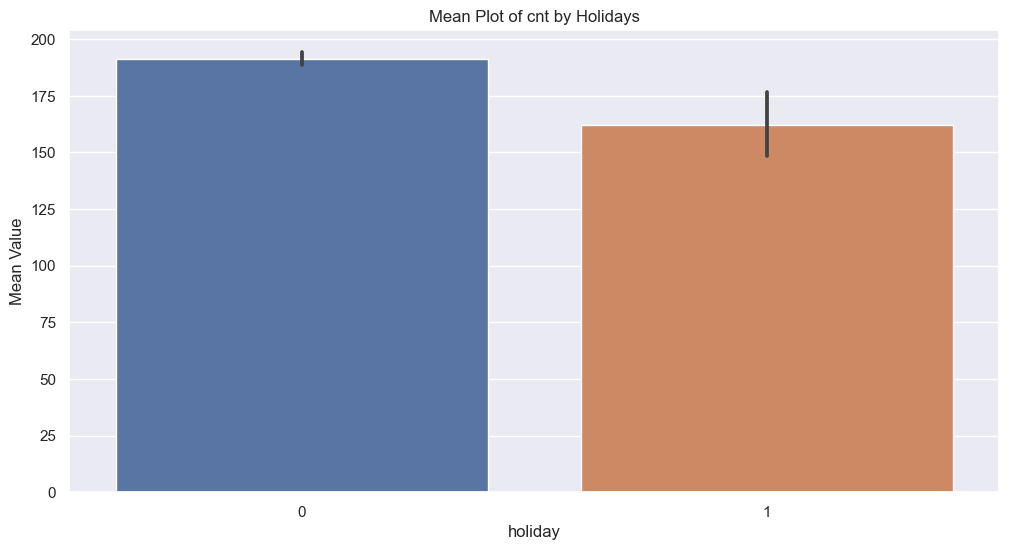

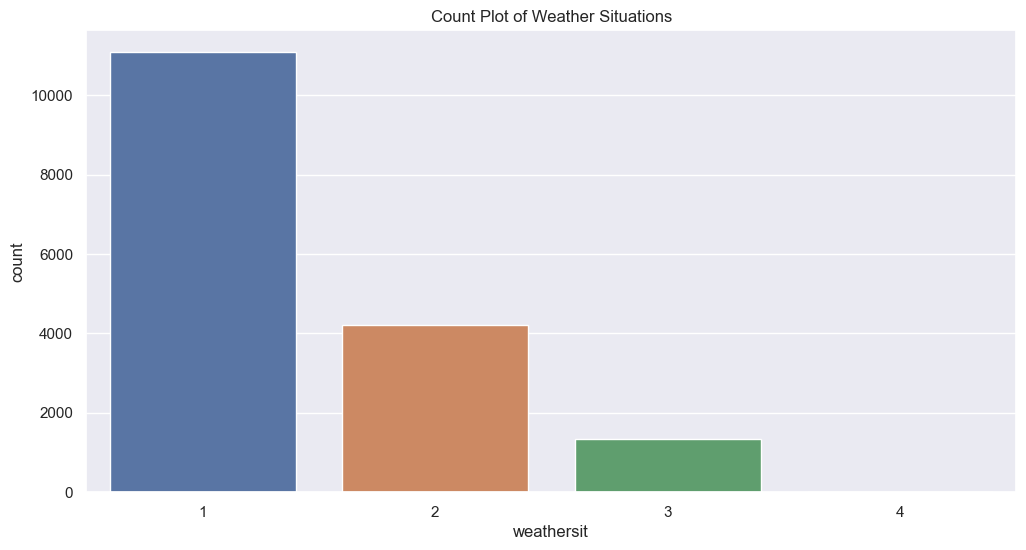

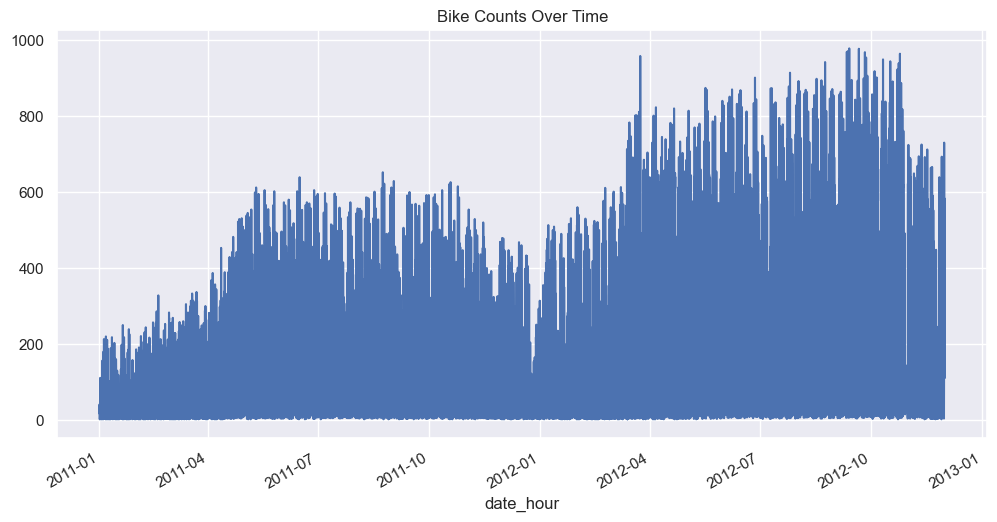

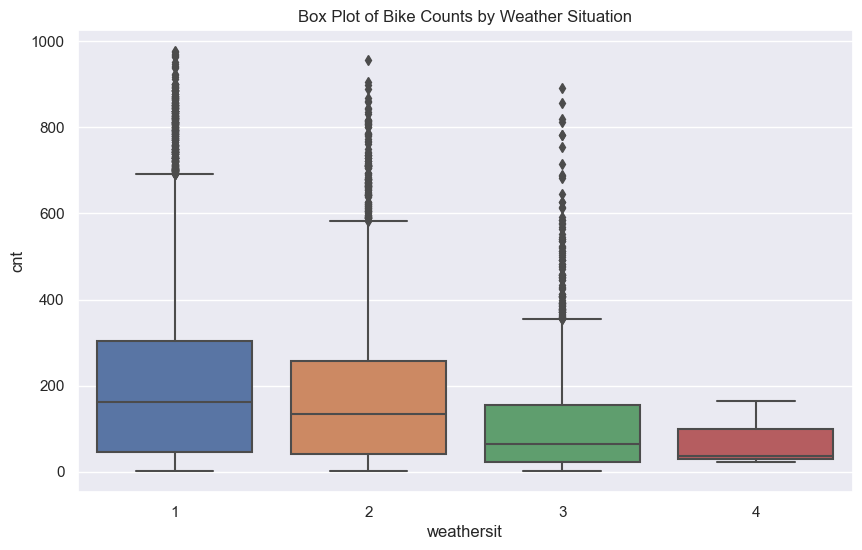

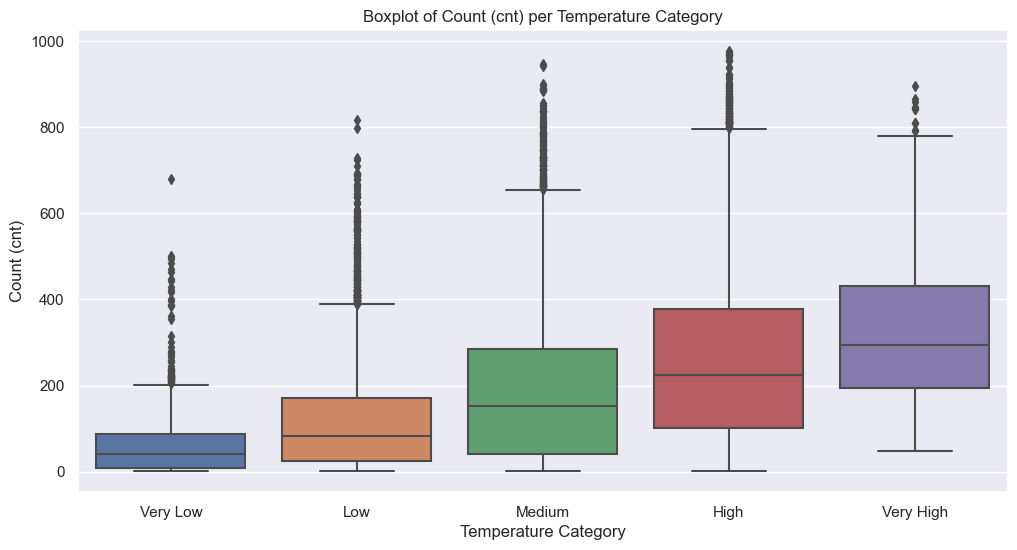

In [6]:
"""
Visualize the distribution, relationships, and patterns in the given DataFrame 'df'.

1. Histogram of Bike Counts:
   - Generates a histogram of the 'cnt' column using 30 bins and includes kernel density estimation.
   - Offers an overview of the distribution of bike counts.

2. Pair Plot of Variables:
   - Constructs a pair plot for the variables 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.
   - Explores the pairwise relationships between these variables.
3. Correlation Matrix Heatmap:
   - Computes the correlation matrix for 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.
   - Exhibits a heatmap with annotations to depict the correlation coefficients visually.
4. Mean Plot of Bike Counts by Holidays:
   - Generates a bar plot illustrating the mean bike counts for different holiday situations.
   - Facilitates comprehension of the impact of holidays on bike counts.
5. Count Plot of Weather Situations:
   - Presents a count plot of the 'weathersit' variable.
   - Aids in understanding the distribution of different weather situations.
6. Time Series Plot of Bike Counts Over Time:
   - Plots the bike counts over time, providing insights into trends and patterns.
7. Box Plot of Bike Counts by Weather Situation:
   - Constructs a box plot to visualize the distribution of cnt for different weather situations.
   - Identifies potential variations in bike counts based on weather conditions.
8. Box Plot of Count per Temperature Category:
   - Segments the 'temp' variable into temperature categories and plots a box plot.
   - Enhances understanding of the relationship between temperature and bike counts.
Parameters:
- df: DataFrame
    The input DataFrame containing relevant columns for visualization.
"""

plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Counts')
plt.show()

sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.title('Pair Plot of Variables')
plt.show()

correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='holiday', y='cnt', data=df)
plt.title('Mean Plot of cnt by Holidays')
plt.ylabel('Mean Value')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='weathersit', data=df)
plt.title('Count Plot of Weather Situations')
plt.show()


df['date_hour'] = pd.to_datetime(df['date_hour'])
df.set_index('date_hour', inplace=True)

plt.figure(figsize=(12, 6))
df['cnt'].plot()
plt.title('Bike Counts Over Time')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Box Plot of Bike Counts by Weather Situation')
plt.show()

temperature_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0] 
temperature_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['temp'], bins=temperature_bins, labels=temperature_labels, include_lowest=True), y='cnt', data=df)
plt.title('Boxplot of Count (cnt) per Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count (cnt)')
plt.show()



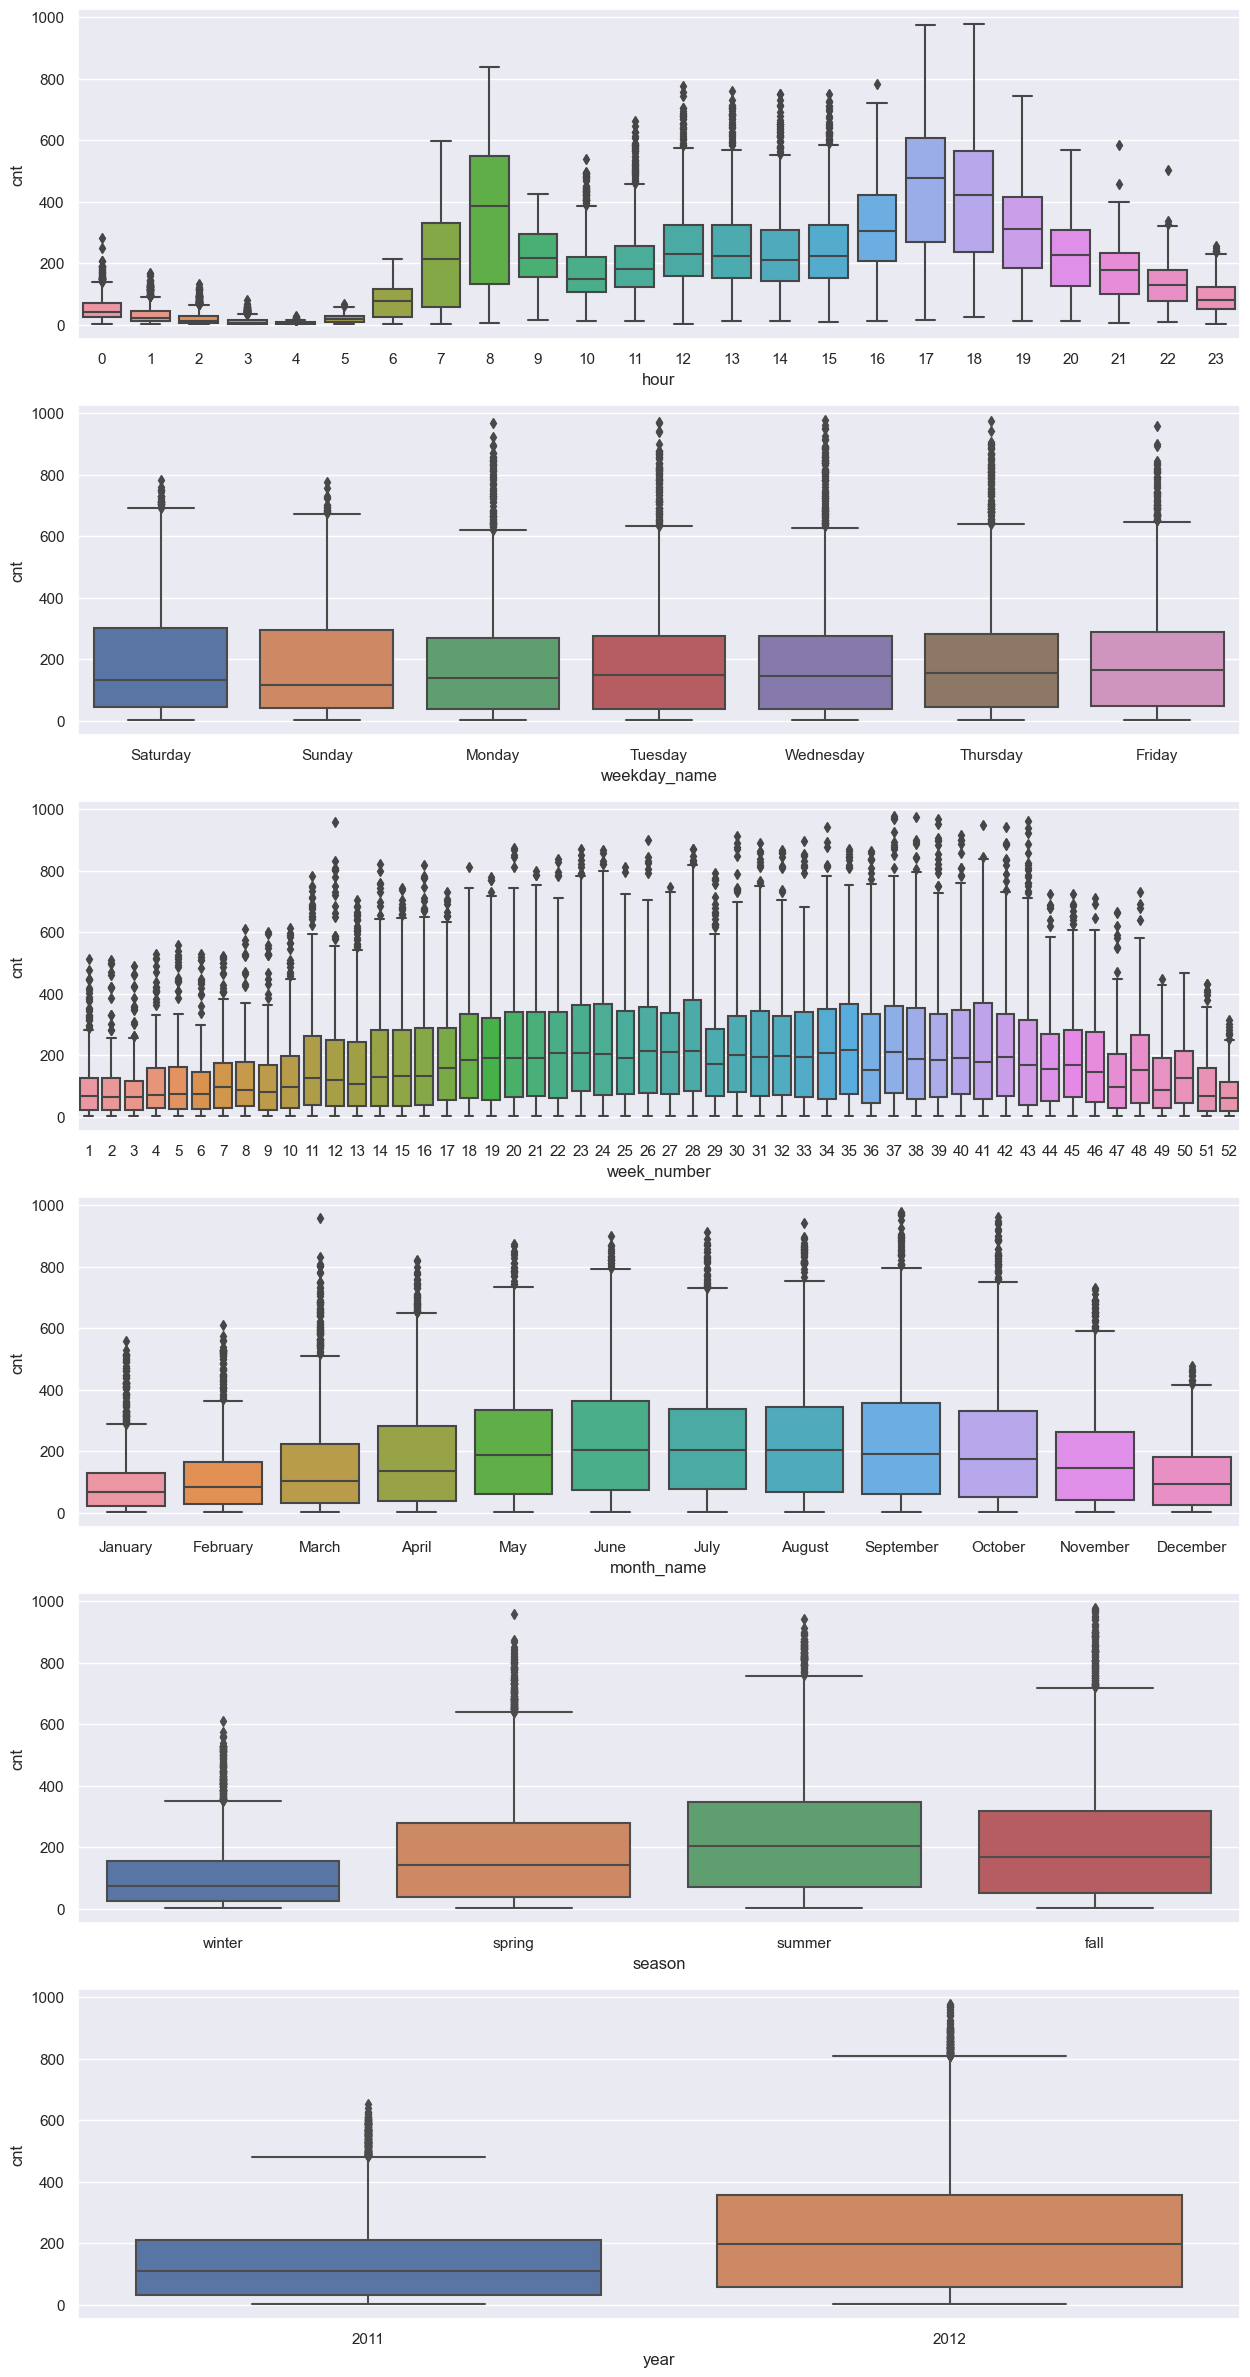

In [7]:
def plot_boxes(df):
    fig, axes = plt.subplots(6, 1, figsize=(15, 30))
    sns.boxplot(data=df, x='hour', y='cnt', ax=axes[0])
    sns.boxplot(data=df, x='weekday_name', y='cnt', ax=axes[1])
    sns.boxplot(data=df, x='week_number', y='cnt', ax=axes[2])
    sns.boxplot(data=df, x='month_name', y='cnt', ax=axes[3])
    sns.boxplot(data=df, x='season', y='cnt', ax=axes[4])
    sns.boxplot(data=df, x='year', y='cnt', ax=axes[5])
    
plot_boxes(df)

Bevindingen

We hebben allereerst gezien dat er twee verschillende soorten temperatuur zijn en alhoewel we weten dat 'atemp' gebaseert is op hoe de temperatuur aanvoelt zien we in meerdere afbeeldingen dat de twee op elkaar lijken, beide hebben correlatie van ongeveer 0.4 tot de 'cnt' target kolom. in het scatterplot zien we dat er meer (extreeme) uitschieters zijn naarmate de tijd toeneemt, hoe betrouwbaar dit is valt nog te betwijfelen sinds naarmate de tijd toeneemt het gemiddelde van 'cnt' ook toeneemt en meer uitschieters dus logisch zijn.
We hebben opgemerkt dat alhoewel 'cnt' met de tijd toeneemt er één extreem lage uitschieter was op 26 oktober 2012, op dat moment was er in washington een orkaan, wat de reden hiervoor waarschijnlijk is.
Verder zijn we met behulp van de boxplots van de weer situaties dat er vier verschillende soorten zijn en we zien dat weer dat hoe meer punten er in een bepaalde situatie zitten hoe hoger de standaarddeviatie en hoe hoger de hoeveelheid buiten de boxplot. we zien verder dat rond december 2011 er een sterke afname was in 'cnt'. we dachten een duidelijk patroon te zien in de seizoenen, dus hebben we een aparte kolom aangemaakt om onderscheid te maken tussen de vier. hierna hebben we 'cnt' gevisualizeerd per seizoen waar we kunnen zien dat er in verhouding tot de andere seizoenen de 'cnt' waardes in de winter erg laag zijn en ze het hoogst zijn in de zomer. 
Er valt bij windspeed te zien dat er een leegte zit tussen een windspeed van 0 en 0.2, dit zal waarschijnlijk betekenen dat alle windsnelheden lager dan 0.1 worden afgerond naar 0

# Time series feature engineering:
### Seizoenspatronen
Seizoenspatronen zijn patronen met een vaste tijdseenheid die pieken of dalen kunnen voorspellen in een tijdserie. Wij hebben dit onderzocht gebruikt makende van een fourier transformatie. Deze transformatie zet de tijdserie om in frequenties met een amplitude. De volgende frequenties hadden een amplitude hoger dan de drempelwaarde die wij hadden gezet op $1.8\cdot{10}^5$. Dit is een waarde waarbij wij vonden dat we de belangrijkste frequenties meenamen. 

Dit zijn de tijdseenheden van de frequenties die zijn waargenomen.
- 1 jaar
- 2/3 jaar (231 dagen)
- 1/2 jaar (173 dagen)
- 1 dag
- 1/2 dag (12 uur)
- 1/3 dag (8 uur)
- 1/5 dag (4.8 uur)

Hier zien wij dat er bij deze tijdseenheden seizoenspatronen zijn. Veel van deze tijdseenheden zijn logisch te verklaren, dit omdat het tijdseenheden zijn die wij een hoop gebruiken in het dagelijks leven.

## Time Series Feature Engineering: Seasonal Patterns
### Seizoenspatronen
Seizoenspatronen, ofwel seizoensgebonden patronen, zijn herhalende trends met een vaste tijdsduur die pieken of dalen in een tijdreeks kunnen voorspellen. Om deze patronen te onderzoeken, hebben we gebruikgemaakt van Fourier-transformatie. Deze transformatie zet de tijdreeks om in frequenties met bijbehorende amplitudes. We hebben een drempelwaarde ingesteld op $1.8\cdot{10}^5$ om alleen frequenties met voldoende significantie te behouden.

De volgende tijdseenheden vertoonden frequenties met een amplitude hoger dan de drempelwaarde:

- 1 jaar
- 2/3 jaar (231 dagen)
- 1/2 jaar (173 dagen)
- 1 dag
- 1/2 dag (12 uur)
- 1/3 dag (8 uur)
- 1/5 dag (4.8 uur)

De keuze van deze tijdseenheden is gebaseerd op de waarde van de amplitude en de relevantie ervan voor de voorspelling van pieken en dalen in de tijdreeks. Het stellen van de drempelwaarde op $1.8\cdot{10}^5$ was een afweging om alleen de meest significante frequenties te behouden.

Het opmerkelijke hierbij is dat veel van deze tijdseenheden overeenkomen met gebruikelijke tijdsduren in ons dagelijks leven. Hierdoor kunnen we logischerwijs verklaren waarom deze frequenties als seizoenspatronen zijn geïdentificeerd.

De geobserveerde tijdseenheden suggereren de aanwezigheid van seizoensgebonden gedrag in de tijdreeks, wat van groot belang kan zijn bij het voorspellen van toekomstige waarden. In de verdere analyse kunnen we deze seizoenspatronen integreren om de nauwkeurigheid van onze voorspellingen te verbeteren.

### Fourier transformatie
De Fourier-transformatie is een krachtige wiskundige techniek die wordt gebruikt om een functie in de tijd (of ruimte) te decomponeren in een reeks sinus- en cosinuscomponenten, ook wel frequentiecomponenten genoemd. Deze transformatie is bijzonder nuttig bij het analyseren van tijdreeksen met seizoenspatronen omdat het ons in staat stelt om de aanwezigheid van cyclische patronen op verschillende tijdschalen te identificeren.

De continue Fourier-transformatie van een functie \(f(t)\) is gegeven door de volgende formule:

$
F(\omega) = \int_{-\infty}^{\infty} f(t) \cdot e^{-i\omega t} \, dt
$

Hierbij is:
- $F(\omega)$ de Fourier-getransformeerde van $f(t)$,
- $\omega$ de frequentie,
- $i$ de imaginaire eenheid $(i^2 = -1)$,
- $t$ de tijd, en
- $f(t)$ de oorspronkelijke functie in de tijd.

De discrete vorm van de Fourier-transformatie, die vaak wordt toegepast op discrete tijdreeksen, zoals in ons geval, is gegeven door:

$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i \frac{2\pi}{N}kn}
$

Hierbij is:
- $X_k$ de $k$-de component van de Fourier-getransformeerde,
- $x_n$ het $n$-de punt in de tijdreeks,
- $N$ het totale aantal punten in de tijdreeks, en
- $k$ de index van de frequentiecomponent.

Wanneer we de Fourier-transformatie toepassen op een tijdreeks, krijgen we een spectrum van frequentiecomponenten, elk met een bijbehorende amplitude. In het geval van tijdreeksen met seizoenspatronen, zullen bepaalde frequenties en hun amplitudes opvallen, wat aangeeft welke cyclische patronen aanwezig zijn in de data.

Door deze seizoensgebonden frequenties te identificeren en hun amplitudes te analyseren, kunnen we inzicht krijgen in de regelmatige patronen die zich herhalen in de tijdreeks. Dit stelt ons in staat om beter voorbereid te zijn op toekomstige schommelingen en deze in overweging te nemen bij het maken van voorspellingen.


In [8]:
def fft_freq(values, threshold):
    fig = plt.figure(figsize=(10, 4))
    
    freq = np.fft.fftfreq(len(values), 1)
    raw_result = np.fft.fft(values)
    
    cleaned_raw_result =  np.array([x if (x >= threshold*10**5) | (x <= -threshold*10**5) else 0 for x in raw_result])
    
    result = np.abs(raw_result)
    
    cleaned_result = np.array([x if (x >= threshold*10**5) & (y > 0) else 0 for x, y in zip(result, freq)])
    
    plt.plot(freq, raw_result)
    plt.xlim([-0.02, 0.13])
    plt.ylim([-5*10**5, 3.5*10**6])
    plt.axhline(threshold*10**5, color='green', dashes=(5, 5))
    
    fft_df = pd.DataFrame({'amplitude':cleaned_result[cleaned_result > 0][1:]})
    fft_df['freq'] = freq[cleaned_result > 0][1:]
    fft_df['duur in uren'] = 1/fft_df['freq']
    fft_df['duur in dagen'] = 1/fft_df['freq']/24
    fft_df['duur in maanden'] = 1/fft_df['freq']/24/(365/12)
    fft_df['duur in jaren'] = 1/fft_df['freq']/24/365
    
    fft_df['freq'] = [fft_df['freq'][0]] + [x if (x-y > x*0.1) else None 
                           for x, y in zip(fft_df['freq'][1:], fft_df['freq'][:-1])]
    
    fft_df = fft_df.dropna().reset_index(drop=True)
    
    
    return fft_df, freq, cleaned_raw_result

c:\Users\jesse\anaconda3\envs\myenv\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


,amplitude,freq,duur in uren,duur in dagen,duur in maanden,duur in jaren
0,560236.241034,0.000120,8318.500000,346.604167,11.395205,0.949600
1,217822.744688,0.000180,5545.666667,231.069444,7.596804,0.633067
2,249918.605480,0.000240,4159.250000,173.302083,5.697603,0.474800
3,702799.953019,0.041594,24.041908,1.001746,0.032934,0.002745
4,306064.251401,0.077418,12.916925,0.538205,0.017694,0.001475
5,204856.186038,0.124962,8.002405,0.333434,0.010962,0.000914
6,180934.849803,0.208271,4.801443,0.200060,0.006577,0.000548


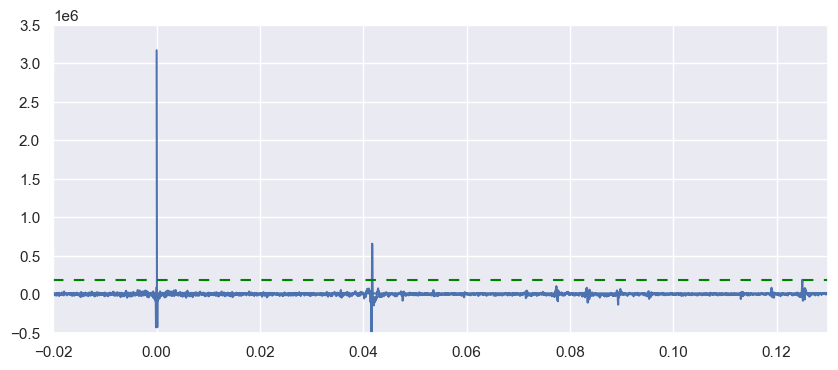

In [9]:
fft_df, freq, result = fft_freq(df['cnt'], 1.8)
display(fft_df)

### Inverse fourier transformatie
Nu we de fourier transformatie hebben gedaan, de waardes hebben opgeschoond en de relevante frequenties hebben. Kunnen we de inverse van de fourier transformatie uitvoeren. Dit betekent dat we van frequenties en amplitudes weer terug gaan naar een tijd reeks. Hiermee kunnen we zien wat de impact is van de meest relevante frequenties en hoe de grafiek eruit had gezien als we alleen deze frequenties in de data zouden hebben.

In [10]:
def inverted_fft(freq, result, df):
    cnt = np.fft.ifft(result).real
    
    ifft_df = pd.DataFrame({'date_hour': df['date_hour'], 'cnt': cnt})
    ifft_df['week'] = ifft_df['date_hour'].dt.isocalendar().week

    return ifft_df
    
def compare_ifft(df, ifft_df):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=True)
    sns.boxplot(x=ifft_df['week'], y=ifft_df['cnt'], ax=axes[0])
    sns.boxplot(data=df, x='week_number', y='cnt', ax=axes[1])
    
    
ifft_df = inverted_fft(freq, result, df)
display(ifft_df)

compare_ifft(df, ifft_df)

KeyError: 'date_hour'

### Feature engineering
Door te kijken naar de frequenties die uit de fourier analyse komt kunnen wij extra kolommen toevoegen die sinus en cosinus golven toevoegd als kolom. Hierdoor kan een model deze frequenties ook benutten en zo zorgen voor betere voorspellingen. Dit helpt het model aangezien er al een hoop van het werk is gedaan om de huidige tijdsreeks na te bootsen.

In [ ]:
annual_fourier = CalendarFourier(freq='A', order =  1)
quarterly_fourier = CalendarFourier(freq='M', order =  1)
daily_fourier = CalendarFourier(freq='D', order = 1)

In [ ]:
dp = DeterministicProcess(index=df['date_hour'], constant=False, order=0, seasonal=False,
                          additional_terms = [annual_fourier, quarterly_fourier, daily_fourier], drop = False)

fourier_terms = dp.in_sample().reset_index()
fourier_terms['date_hour'] = pd.to_datetime(fourier_terms['date_hour'])
display(fourier_terms)

,date_hour,"sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(1,freq=M)","cos(1,freq=M)","sin(1,freq=D)","cos(1,freq=D)"
0,2011-01-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,2011-01-01 01:00:00,0.000717,1.000000,0.008445,0.999964,0.258819,0.965926
2,2011-01-01 02:00:00,0.001435,0.999999,0.016889,0.999857,0.500000,0.866025
3,2011-01-01 03:00:00,0.002152,0.999998,0.025333,0.999679,0.707107,0.707107
4,2011-01-01 04:00:00,0.002869,0.999996,0.033774,0.999429,0.866025,0.500000
...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,-0.510494,0.859881,-0.043619,0.999048,-0.965926,0.258819
16633,2012-11-30 20:00:00,-0.509879,0.860246,-0.034899,0.999391,-0.866025,0.500000
16634,2012-11-30 21:00:00,-0.509263,0.860611,-0.026177,0.999657,-0.707107,0.707107
16635,2012-11-30 22:00:00,-0.508647,0.860975,-0.017452,0.999848,-0.500000,0.866025


(14975.0, 14977.0)

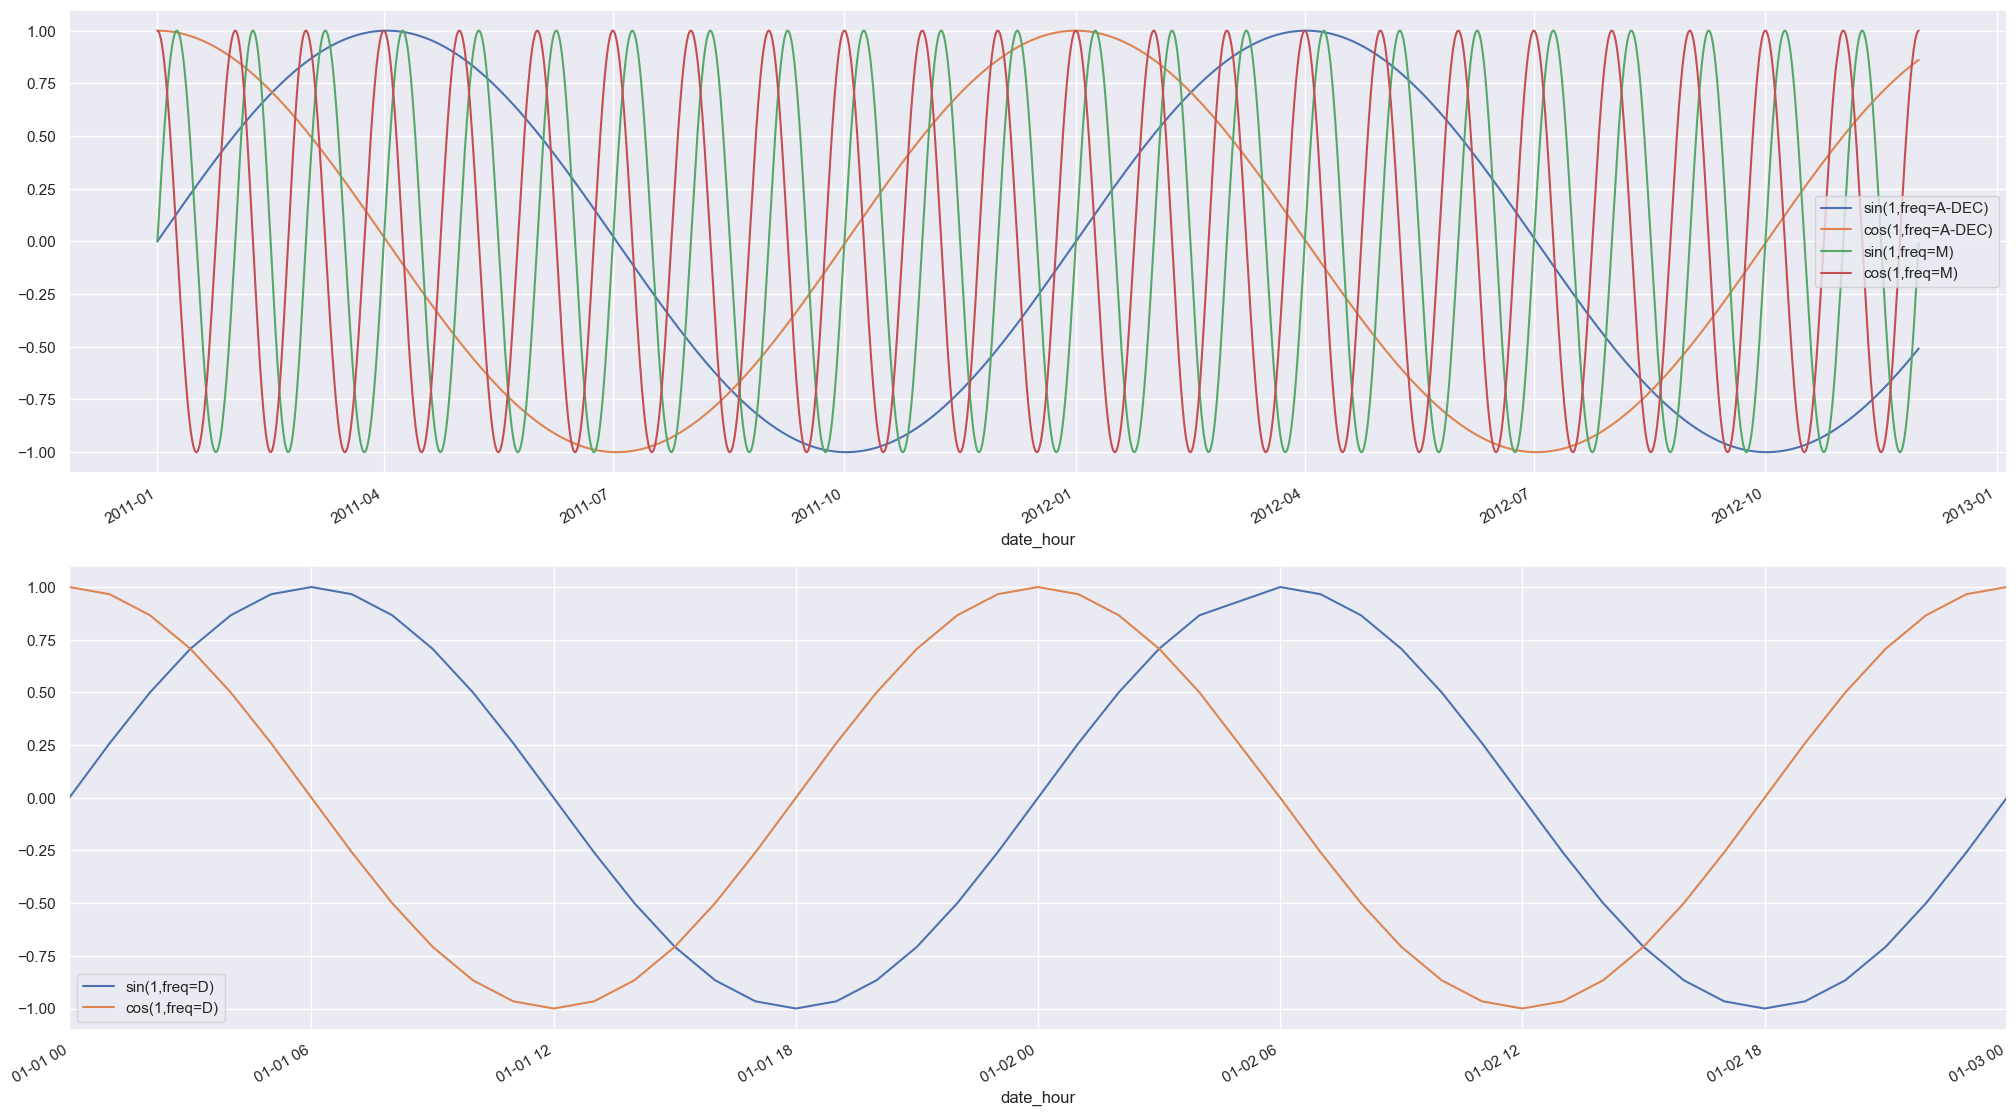

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(25, 15))

ax[0] = fourier_terms.plot(ax=ax[0], y=fourier_terms.columns[1], x=('date_hour'))
ax[0] = fourier_terms.plot(ax=ax[0], y=fourier_terms.columns[2], x=('date_hour'))

ax[0] = fourier_terms.plot(ax=ax[0], y=fourier_terms.columns[3], x=('date_hour'))
ax[0] = fourier_terms.plot(ax=ax[0], y=fourier_terms.columns[4], x=('date_hour'))

ax[1] = fourier_terms.plot(ax=ax[1], y=fourier_terms.columns[5], x=('date_hour'))
ax[1] = fourier_terms.plot(ax=ax[1], y=fourier_terms.columns[6], x=('date_hour'))


day_start_date = pd.to_datetime('2011-01-01')
day_end_date = pd.to_datetime('2011-01-03')

ax[1].set_xlim(day_start_date, day_end_date)

In [ ]:
cleaned_fourier_terms = fourier_terms.drop(['date_hour'], axis=1)

In [ ]:
df = pd.concat([df, cleaned_fourier_terms], axis=1)
display(df)

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,hour,dayofweek,...,month,month_name,year,season,"sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(1,freq=M)","cos(1,freq=M)","sin(1,freq=D)","cos(1,freq=D)"
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16,0,5,...,1,January,2011,winter,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40,1,5,...,1,January,2011,winter,0.000717,1.000000,0.008445,0.999964,0.258819,0.965926
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32,2,5,...,1,January,2011,winter,0.001435,0.999999,0.016889,0.999857,0.500000,0.866025
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13,3,5,...,1,January,2011,winter,0.002152,0.999998,0.025333,0.999679,0.707107,0.707107
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1,4,5,...,1,January,2011,winter,0.002869,0.999996,0.033774,0.999429,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377,19,4,...,11,November,2012,fall,-0.510494,0.859881,-0.043619,0.999048,-0.965926,0.258819
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245,20,4,...,11,November,2012,fall,-0.509879,0.860246,-0.034899,0.999391,-0.866025,0.500000
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183,21,4,...,11,November,2012,fall,-0.509263,0.860611,-0.026177,0.999657,-0.707107,0.707107
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163,22,4,...,11,November,2012,fall,-0.508647,0.860975,-0.017452,0.999848,-0.500000,0.866025


## Autocorrelatie
Autocorrelatie verwijst naar de correlatie van een tijdreeks met zichzelf, gemeten op verschillende tijdsafstanden. Het kan helpen om patronen in de tijdreeks te identificeren en is essentieel bij het begrijpen van zowel cycli als seizoenspatronen.

### Partial autocorrelatie
Partial autocorrelatie is de autocorrelatie maar dan zonder terugkerende seizoenspatronen. Dit houdt in dat als je al een patroon hebt herkend bij bijvoorbeeld 24 uur dan word dit signaal onderdrukt elke nieuwe instantie van 24 uur. Hierdoor kan je makkelijker zien over er overlappende seizoenspatronen of cycli voorkomen en deze gebruiken voor de analyse van de tijdsreeks.

### Autocorrelatie en cycli:

Cycli in een tijdreeks verwijzen naar langere-termijnpatronen die zich herhalen, maar niet noodzakelijk met een vast tijdsinterval zoals seizoenspatronen. Cycli kunnen bijvoorbeeld betrekking hebben op economische cycli, die jaren kunnen beslaan. Wanneer we de autocorrelatiefunctie (ACF) toepassen op een tijdreeks met cycli, zullen we pieken zien op de momenten waarop de cycli herhalen.

### Autocorrelatie en seizoenspatronen:

Seizoenspatronen hebben betrekking op regelmatige fluctuaties in een tijdreeks met een vast tijdsinterval, zoals dagelijks, maandelijks of jaarlijks. Wanneer we de autocorrelatie toepassen op een tijdreeks met seizoenspatronen, zullen we duidelijke pieken zien op veelvouden van het seizoensinterval. Bijvoorbeeld, als het seizoensinterval dagelijks is, zouden we pieken verwachten op 24, 48, 72 enzovoort.

### Waarom cycli anders zijn dan seizoenspatronen:

Het belangrijkste verschil tussen cycli en seizoenspatronen ligt in de duur en het karakter van herhaling. Cycli hebben vaak een langere duur en minder consistente tijdsintervallen tussen herhalingen. Seizoenspatronen, aan de andere kant, hebben meestal een kortere en regelmatig herhalende duur.

Bij het analyseren van de autocorrelatie is het van belang om zowel cycli als seizoenspatronen in overweging te nemen, omdat beide types patronen van invloed kunnen zijn op het gedrag van de tijdreeks. Het identificeren van deze patronen met behulp van autocorrelatieanalyses kan helpen bij het modelleren en voorspellen van toekomstige waarden in de tijdreeks.

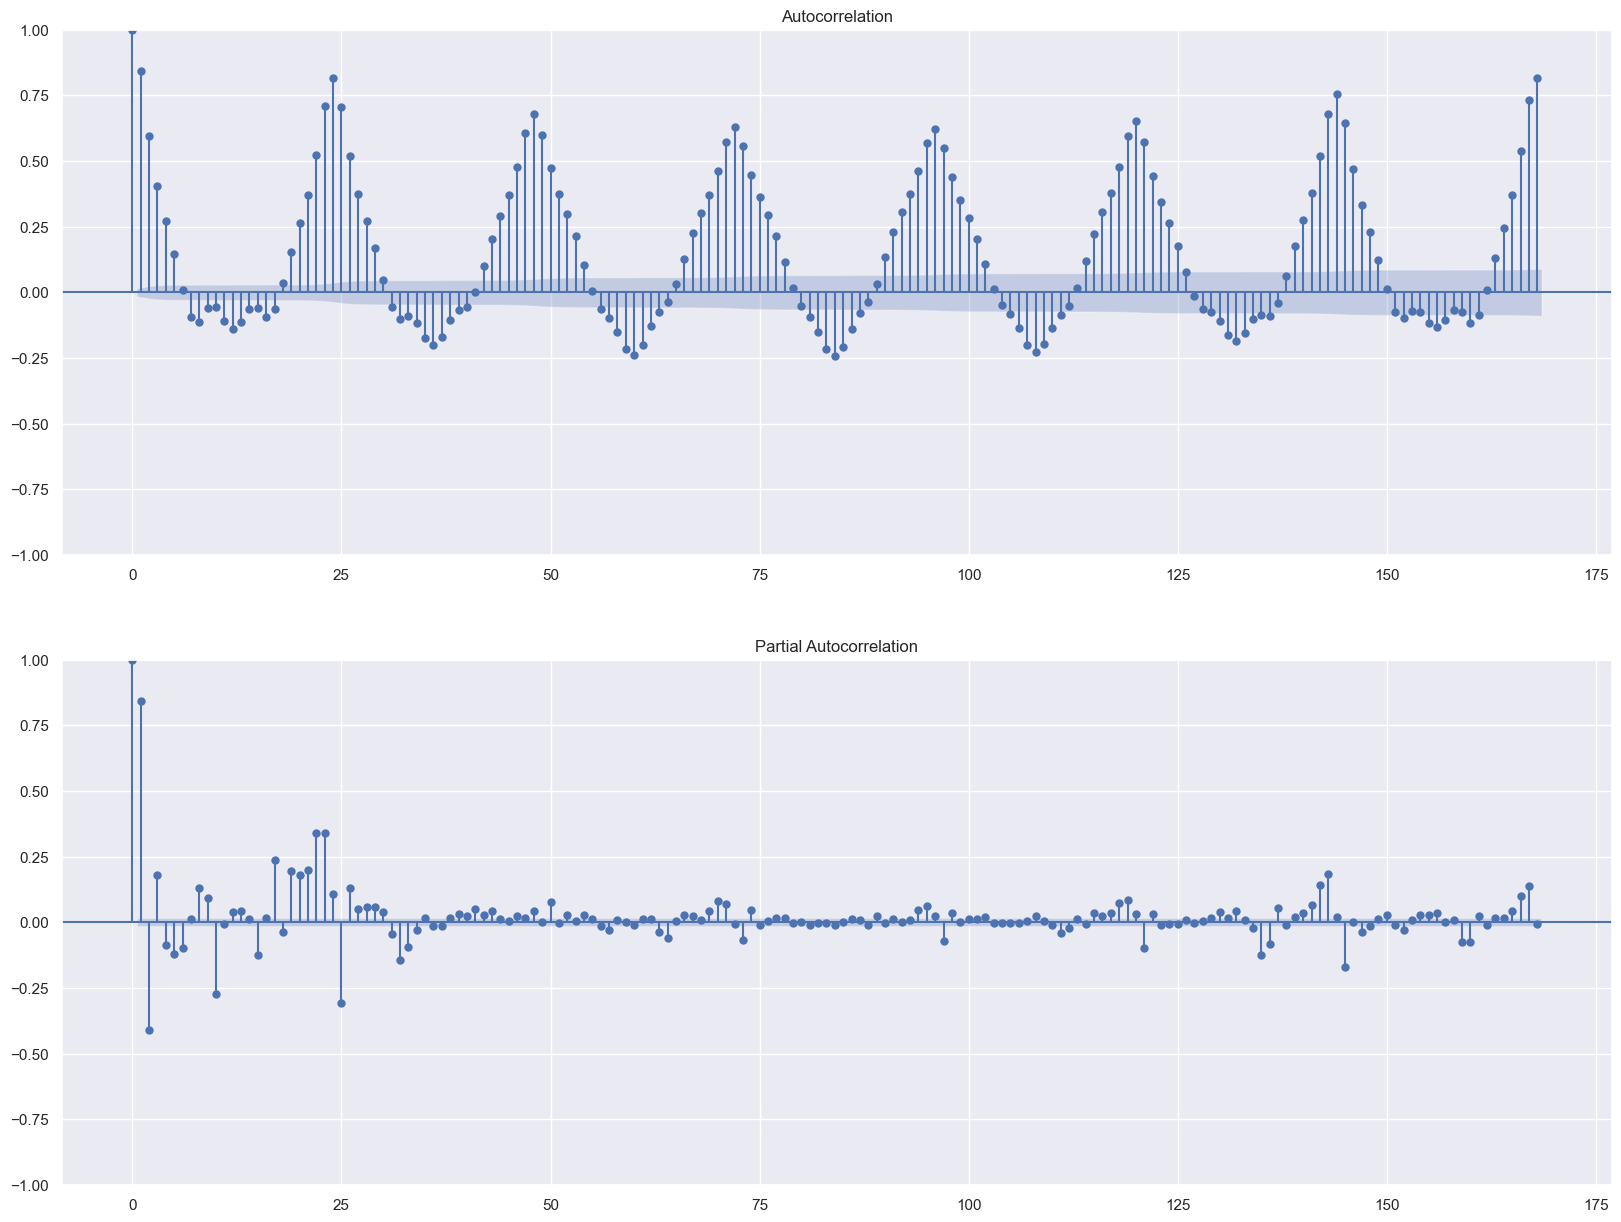

In [ ]:
def auto_correlation(df):
    fig, ax = plt.subplots(2, 1, figsize=(20, 15))
    plot_acf(df['cnt'], ax=ax[0], lags=24*7)
    plot_pacf(df['cnt'], ax=ax[1], lags=24*7)

auto_correlation(df)

In [ ]:
df = pd.merge(df, fourier_terms, on='date_hour', how='inner')
df

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt,hour,dayofweek,...,"sin(1,freq=M)_x","cos(1,freq=M)_x","sin(1,freq=D)_x","cos(1,freq=D)_x","sin(1,freq=A-DEC)_y","cos(1,freq=A-DEC)_y","sin(1,freq=M)_y","cos(1,freq=M)_y","sin(1,freq=D)_y","cos(1,freq=D)_y"
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16,0,5,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40,1,5,...,0.008445,0.999964,0.258819,0.965926,0.000717,1.000000,0.008445,0.999964,0.258819,0.965926
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32,2,5,...,0.016889,0.999857,0.500000,0.866025,0.001435,0.999999,0.016889,0.999857,0.500000,0.866025
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13,3,5,...,0.025333,0.999679,0.707107,0.707107,0.002152,0.999998,0.025333,0.999679,0.707107,0.707107
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1,4,5,...,0.033774,0.999429,0.866025,0.500000,0.002869,0.999996,0.033774,0.999429,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377,19,4,...,-0.043619,0.999048,-0.965926,0.258819,-0.510494,0.859881,-0.043619,0.999048,-0.965926,0.258819
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245,20,4,...,-0.034899,0.999391,-0.866025,0.500000,-0.509879,0.860246,-0.034899,0.999391,-0.866025,0.500000
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183,21,4,...,-0.026177,0.999657,-0.707107,0.707107,-0.509263,0.860611,-0.026177,0.999657,-0.707107,0.707107
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163,22,4,...,-0.017452,0.999848,-0.500000,0.866025,-0.508647,0.860975,-0.017452,0.999848,-0.500000,0.866025


In [ ]:
warnings.filterwarnings("ignore")

X = df.drop(['cnt', 'weekday_name', 'month_name', 'date_hour'], axis=1)
y = df['cnt']

season_label_encoder = LabelEncoder()
X['season'] = season_label_encoder.fit_transform(X['season'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols1 = ['weekday_name', 'month_name']
categorical_cols = ['season']
numerical_cols = X.columns.difference(categorical_cols1)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = make_pipeline(preprocessor, LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True],
    'linearregression__copy_X': [True]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r_squared = r2_score(y_test, predictions)

best_hyperparameters = grid_search.best_params_
print(f"Best hyperparameters: {best_hyperparameters}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")






ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
warnings.filterwarnings("ignore")

X = df.drop(['cnt', 'weekday_name', 'month_name','date_hour'], axis=1)
y = df['cnt']

season_label_encoder = LabelEncoder()
X['season'] = season_label_encoder.fit_transform(X['season'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols1 = ['weekday_name', 'month_name']  
categorical_cols = ['season']
numerical_cols = X.columns.difference(categorical_cols1)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

lin_reg = LinearRegression()
lin_param_grid = {
    'normalize': [False],
    'fit_intercept': [True],
    'copy_X': [True]
}
lin_grid = GridSearchCV(lin_reg, lin_param_grid, cv=5)
lin_grid.fit(X_train, y_train)

print("Best parameters for Linear Regression:")
print(lin_grid.best_params_)

lin_predicted = cross_val_predict(lin_grid.best_estimator_, X_train, y_train, cv=5)

residuals = y_train - lin_predicted

rf = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [150],
    'max_depth': [None],  
    'min_samples_split': [2]  
    
}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid.fit(X_train, residuals)

print("\nBest parameters for RandomForestRegressor:")
print(rf_grid.best_params_)

lin_pred_test = lin_grid.best_estimator_.predict(X_test)
rf_pred_test = rf_grid.predict(X_test)

final_pred_test = lin_pred_test + rf_pred_test

rmse = np.sqrt(mean_squared_error(y_test, final_pred_test))
print(f"\nRMSE of the hybrid model: {rmse}")


Best parameters for Linear Regression:
{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Best parameters for RandomForestRegressor:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

RMSE of the hybrid model: 38.812369667001114


Ensemble is een machine learning techniek waarbij een ensemble van verschillende machine learning modellen, ook wel base learners genoemd, wordt gebruikt. Het principe hierachter is dat door de voorspellingen van meerdere modellen samen te nemen, ze op elkaars sterktes kunnen inspelen. Er zijn verschillende methoden om dit te doen, waaronder stacking, boosting, voting en bagging. Deze benaderingen maken gebruik van wiskundige principes zoals de Wet van de Grote Getallen en het Centrale Limiet Theorema om nauwkeurigere en robuustere voorspellingen te verkrijgen.

Support Vector Regression (SVR):
SVR is specifiek gekozen vanwege zijn vermogen om niet-lineaire relaties in de data te modelleren. Bij het fine-tunen van de hyperparameters hebben we gebruikgemaakt van grid search over de volgende parameters:

C (Regularisatieparameter): We hebben waarden zoals 0.1 en 1 overwogen. Een kleinere C-waarde staat meer fouttolerantie toe, wat nuttig kan zijn bij het omgaan met ruis in de gegevens.

Epsilon (Tube Breedte): We hebben waarden zoals 0.1 en 0.2 overwogen. Dit bepaalt de breedte van de tube rond de ondersteuningsvectoren.

Deze keuzes zijn strategisch gemaakt om een goed gebalanceerde afweging te vinden tussen modelcomplexiteit en het vermogen om verschillende patronen in de data vast te leggen.

Random Forest:
Voor Random Forest hebben we de volgende hyperparameters aangepast met behulp van grid search:

Aantal bomen (n_estimators): We hebben zowel 50 als 100 overwogen. Dit aantal bomen beïnvloedt de diversiteit van het ensemble.

Maximale diepte van de boom (max_depth): Zowel 'None' als 10 werden overwogen. Een diepere boom kan complexere patronen vastleggen, maar kan ook leiden tot overpassen.

Minimale splitsingsgrootte (min_samples_split) en minimale bladgrootte (min_samples_leaf): We hebben waarden zoals 2 en 5 voor splitsingsgrootte en 1 en 2 voor bladgrootte overwogen. Deze parameters regelen de groei van de individuele bomen.

Deze hyperparameters zijn zorgvuldig gekozen om overfitting te verminderen en ervoor te zorgen dat het Random Forest-model goed generaliseert naar nieuwe gegevens.

Gradient Boosting:
Bij Gradient Boosting hebben we gekeken naar de volgende hyperparameters:

Aantal bomen (n_estimators): We hebben zowel 50 als 100 overwogen. Net als bij Random Forest, beïnvloedt dit de modelcomplexiteit en rekenkracht.

Leersnelheid (learning_rate): Zowel 0.01 als 0.1 werden overwogen. Dit bepaalt de bijdrage van elke boom aan de voorspelling.

Maximale diepte van de boom (max_depth): Zowel 3 als 5 werden overwogen. Dit regelt de complexiteit van individuele bomen.

Deze keuzes zijn gericht op het vinden van een goede balans tussen stabiliteit, snelheid van leren en complexiteit.

# Support Vector Regression (SVR):
$[ f(x) = \sum_{i=1}^{N} \alpha_i \cdot K(x, x_i) + b ]$

# Random Forest:
$[ f(x) = \frac{1}{N} \sum_{j=1}^{N} T_j(x) $]


# Gradient Boosting:
$[ f(x) = \sum_{m=1}^{M} \gamma_m h_m(x) $]


# VotingRegressor
$[ f(x) = \sum_{i=1}^{K} w_i \cdot f_i(x) $]


In [11]:
"""1. Loads the df, dataset 
2. Preprocesses the data by encoding categorical features and splitting it into training and testing sets.
3. Defines transformers for numerical and categorical features using scikit-learn pipelines.
4. Applies a column transformer to preprocess numerical and categorical features together.
5. Conducts hyperparameter tuning for Support Vector Regression, Random Forest, and Gradient Boosting models.
6. Trains each model using the best hyperparameters obtained from the tuning process.
7. Creates a Voting Regressor ensemble model with weighted contributions from the individual models.
8. Evaluates the ensemble model's performance on the test set using mean squared error.

Parameters:
- df: DataFrame
    The input DataFrame containing relevant columns for visualization."""



import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

X = df.drop(['cnt', 'weekday_name', 'month_name'], axis=1)
y = df['cnt']

season_label_encoder = LabelEncoder()
X['season'] = season_label_encoder.fit_transform(X['season'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols1 = ['weekday_name', 'month_name', 'season']  
categorical_cols = ['season']
numerical_cols = X.columns.difference(categorical_cols1)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

svr_param_grid = {
    'C': [0.1, 1],
    'epsilon': [0.1, 0.2]
}

svr_model = SVR()
svr_grid = GridSearchCV(svr_model, svr_param_grid, cv=5, n_jobs=-1)
svr_pipeline = make_pipeline(preprocessor, svr_grid)
svr_pipeline.fit(X_train, y_train)
best_svr_model = svr_grid.best_estimator_

rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
rf_pipeline = make_pipeline(preprocessor, rf_grid)
rf_pipeline.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_param_grid, cv=5, n_jobs=-1)
gb_pipeline = make_pipeline(preprocessor, gb_grid)
gb_pipeline.fit(X_train, y_train)
best_gb_model = gb_grid.best_estimator_

voting_model = VotingRegressor(estimators=[('rf', best_rf_model), ('gb', best_gb_model), ('svr', best_svr_model)], weights=[2, 1, 1])

voting_model.fit(X_train, y_train)

predictions = voting_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Best Random Forest Hyperparameters: {rf_grid.best_params_}')
print(f'Best Gradient Boosting Hyperparameters: {gb_grid.best_params_}')
print(f'Best Support Vector Regression Hyperparameters: {svr_grid.best_params_}')
print(rmse)

Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Support Vector Regression Hyperparameters: {'C': 1, 'epsilon': 0.2}
61.090019918077495


In [ ]:
"""Codecell that creates a lineplot and a boxplot.

1.	The x and y values are set on ‘date_hour’ and ‘cnt’
2.	The labels and tick rotation are set
3.	The visualisations are created

Parameters:
- df: DataFrame
    The input DataFrame containing relevant columns for visualization.""""""


In [12]:
"""
Visualize the distribution, relationships, and patterns in the given DataFrame 'df'.

1. Histogram of Bike Counts:
   - Generates a histogram of the 'cnt' column using 30 bins and includes kernel density estimation.
   - Offers an overview of the distribution of bike counts.

2. Pair Plot of Variables:
   - Constructs a pair plot for the variables 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.
   - Explores the pairwise relationships between these variables.
3. Correlation Matrix Heatmap:
   - Computes the correlation matrix for 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.
   - Exhibits a heatmap with annotations to depict the correlation coefficients visually.
4. Mean Plot of Bike Counts by Holidays:
   - Generates a bar plot illustrating the mean bike counts for different holiday situations.
   - Facilitates comprehension of the impact of holidays on bike counts.
5. Count Plot of Weather Situations:
   - Presents a count plot of the 'weathersit' variable.
   - Aids in understanding the distribution of different weather situations.
6. Time Series Plot of Bike Counts Over Time:
   - Plots the bike counts over time, providing insights into trends and patterns.
7. Box Plot of Bike Counts by Weather Situation:
   - Constructs a box plot to visualize the distribution of cnt for different weather situations.
   - Identifies potential variations in bike counts based on weather conditions.
8. Box Plot of Count per Temperature Category:
   - Segments the 'temp' variable into temperature categories and plots a box plot.
   - Enhances understanding of the relationship between temperature and bike counts.
Parameters:
- df: DataFrame
    The input DataFrame containing relevant columns for visualization.
"""


"\nVisualize the distribution, relationships, and patterns in the given DataFrame 'df'.\n\n1. Histogram of Bike Counts:\n   - Generates a histogram of the 'cnt' column using 30 bins and includes kernel density estimation.\n   - Offers an overview of the distribution of bike counts.\n\n2. Pair Plot of Variables:\n   - Constructs a pair plot for the variables 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.\n   - Explores the pairwise relationships between these variables.\n3. Correlation Matrix Heatmap:\n   - Computes the correlation matrix for 'temp', 'atemp', 'hum', 'windspeed', and 'cnt'.\n   - Exhibits a heatmap with annotations to depict the correlation coefficients visually.\n4. Mean Plot of Bike Counts by Holidays:\n   - Generates a bar plot illustrating the mean bike counts for different holiday situations.\n   - Facilitates comprehension of the impact of holidays on bike counts.\n5. Count Plot of Weather Situations:\n   - Presents a count plot of the 'weathersit' variable.\n   -

In [ ]:
"""1. Loads the df, dataset 
2. Preprocesses the data by encoding categorical features and splitting it into training and testing sets.
3. Defines transformers for numerical and categorical features using scikit-learn pipelines.
4. Applies a column transformer to preprocess numerical and categorical features together.
5. Conducts hyperparameter tuning for Support Vector Regression, Random Forest, and Gradient Boosting models.
6. Trains each model using the best hyperparameters obtained from the tuning process.
7. Creates a Voting Regressor ensemble model with weighted contributions from the individual models.
8. Evaluates the ensemble model's performance on the test set using mean squared error.

Parameters:
- df: DataFrame
    The input DataFrame containing relevant columns for visualization."""

